<a href="https://colab.research.google.com/github/7Ayushh/Cp-SOC-Ayushh/blob/main/chd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#upload files - standard code
from google.colab import files
uploaded= files.upload()
#importing librarires
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Saving duplicatekaduplicate - Sheet1.csv to duplicatekaduplicate - Sheet1.csv


In [ ]:
df=pd.read_csv("duplicatekaduplicate - Sheet1.csv")
df

In [31]:
df_orig = pd.read_csv("duplicatekaduplicate - Sheet1.csv")
df_orig['Age'].value_counts()

14-20         20
21-30         12
31-40         11
41-50         11
51-60          8
60+            3
Don't know     1
Name: Age, dtype: int64

In [40]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df_orig = pd.read_csv("duplicatekaduplicate - Sheet1.csv")
df_orig['Place of current residence'] = df_orig['Place of current residence'].replace('Maloya 2','Maloya')
df_orig['Place of current residence'] = df_orig['Place of current residence'].replace('Maloya ','Maloya')
# df_orig = df_orig[df_orig['Age'] != "Don't know"]
df= df.replace("Don't know", np.NaN)
df_orig = df_orig.iloc[:,:3]
df_orig.to_csv('sample.csv', index=False)

In [3]:
df['Place of current residence'] = df['Place of current residence'].replace('Maloya 2','Maloya')
df['Place of current residence'] = df['Place of current residence'].replace('Maloya ','Maloya')
df = df[df['Place of current residence'] != 'Ram Darbar']
df['Place of current residence'].value_counts()

Maloya                        15
Sector 49                     12
Dhanas                        11
Mauli Jagran 2/Sundarnagar    10
Sector 38W                     5
Name: Place of current residence, dtype: int64

In [4]:
df['What was the nature of your movement?'].isna().sum()
df['What was the nature of your movement?'].fillna("unknown", inplace=True)

<ipython-input-4-fd123d76c7da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['What was the nature of your movement?'].fillna("unknown", inplace=True)


In [7]:
df['What was the nature of your movement?'].value_counts()

Forced        17
Voluntary      9
Don't know     6
Name: What was the nature of your movement?, dtype: int64

In [6]:
# unknown ko consider yes or no ??
df = df[df['What was the nature of your movement?'] != 'unknown']

In [8]:
# df_1 = df[df['What was the nature of your movement?']== 'Forced']
# df_1['What was the nature of your movement?'].value_counts()
grouped_data = df.groupby('Place of current residence')['What was the nature of your movement?'].value_counts(normalize=True).mul(100).reset_index(name='%')
grouped_data.rename(columns={'What was the nature of your movement?': 'Nature of Movement'}, inplace=True)
grouped_data.rename(columns={'Place of current residence': 'Place'}, inplace=True)
grouped_data_2 = grouped_data[grouped_data['Nature of Movement'] == 'Forced']
grouped_data_3 = df.groupby('Place of current residence')['What was the nature of your movement?'].value_counts()
print(grouped_data_2)
# print(grouped_data)
# print()
# print(grouped_data_3)
grouped_data_2.to_csv('place_Nature.csv', index=False)

                         Place Nature of Movement           %
1                       Dhanas             Forced   28.571429
3                       Maloya             Forced   63.636364
6   Mauli Jagran 2/Sundarnagar             Forced   57.142857
9                   Sector 38W             Forced  100.000000
10                   Sector 49             Forced   50.000000


In [9]:
grouped_data = df.groupby('Age')['What was the nature of your movement?'].value_counts(normalize=True).mul(100).reset_index(name='%').round(1)
grouped_data.rename(columns={'What was the nature of your movement?': 'Nature of Movement'}, inplace=True)
grouped_data_2 = grouped_data[grouped_data['Nature of Movement'] == 'Forced']
grouped_data_3 = df.groupby('Age')['What was the nature of your movement?'].value_counts().sum()
print(grouped_data_2)
# print(grouped_data)
# print()
# print(grouped_data_3)
grouped_data_2.to_csv('age_Nature.csv', index=False)


# for age 1 entry is left empty

      Age Nature of Movement     %
1   14-20             Forced  40.0
3   21-30             Forced  75.0
5   31-40             Forced  50.0
7   41-50             Forced  60.0
10  51-60             Forced  60.0
13    60+             Forced  50.0


In [10]:
grouped_data = df.groupby('Level of Education')['What was the nature of your movement?'].value_counts(normalize=True).mul(100).reset_index(name='%').round(1)
grouped_data.rename(columns={'What was the nature of your movement?': 'Nature of Movement'}, inplace=True)
grouped_data_2 = grouped_data[grouped_data['Nature of Movement'] == 'Forced']
grouped_data_3 = df.groupby('Level of Education')['What was the nature of your movement?'].value_counts()
print(grouped_data_2)
# print(grouped_data)
# print()
# print(grouped_data_3)
grouped_data_2.to_csv('edu_Nature.csv', index=False)

# what do we want -- forced mei kitne % are 10th passed or 10th pass mei kitne % forced

         Level of Education Nature of Movement      %
0                 10th pass             Forced   40.0
5                  8th pass             Forced   50.0
6                   College             Forced  100.0
8  Currently studying/Other             Forced   50.0
9              Not educated             Forced   77.8


In [11]:
grouped_data = df.groupby('Who else lives in your house? (Amount of people)')['What was the nature of your movement?'].value_counts(normalize=True).mul(100).reset_index(name='%').round(1)
grouped_data.rename(columns={'What was the nature of your movement?': 'Nature of Movement'}, inplace=True)
grouped_data.rename(columns={'Who else lives in your house? (Amount of people)': 'Family Size'}, inplace=True)
grouped_data_2 = grouped_data[grouped_data['Nature of Movement'] == 'Forced']
grouped_data_3 = df.groupby('Who else lives in your house? (Amount of people)')['What was the nature of your movement?'].value_counts()
print(grouped_data_2)
# print(grouped_data)
# print()
# print(grouped_data_3)
grouped_data_2.to_csv('famsize_Nature.csv', index=False)

# what do we want -- forced mei kitne % are 10th passed or 10th pass mei kitne % forced

   Family Size Nature of Movement      %
0          4.0             Forced   50.0
3          5.0             Forced   44.4
6          6.0             Forced   60.0
8          7.0             Forced  100.0


In [19]:
df_1 = df[df['What was the nature of your movement?'] == 'Forced']
grouped_data = df_1.groupby('How is the law and order situation (mahaul) compared to where you lived before?')['Place of current residence'].value_counts(normalize=True).mul(100).reset_index(name='%').round(1)
# grouped_data.rename(columns={'What was the nature of your movement?': 'Nature of Movement'}, inplace=True)
grouped_data.rename(columns={'How is the law and order situation (mahaul) compared to where you lived before?': 'Mahual in previous locality'}, inplace=True)
# grouped_data_2 = grouped_data[grouped_data['Nature of Movement'] == 'Forced']
grouped_data_3 = df_1.groupby('How is the law and order situation (mahaul) compared to where you lived before?')['Place of current residence'].value_counts()
print(grouped_data)
# print(grouped_data)
# print()
# print(grouped_data_3)
# grouped_data_2.to_csv('famsize_Nature.csv', index=False)

# what do we want -- forced mei kitne % are 10th passed or 10th pass mei kitne % forced

  Mahual in previous locality  Place of current residence      %
0                      Better  Mauli Jagran 2/Sundarnagar  100.0
1                        Same                      Maloya  100.0
2                       Worse  Mauli Jagran 2/Sundarnagar   50.0
3                       Worse                      Dhanas   33.3
4                       Worse                  Sector 38W   16.7


In [23]:
df_1 = df[df['What was the nature of your movement?'] == 'Forced']
grouped_data = df_1.groupby('Place of current residence')['Do you feel safe to walk alone at night in your community?'].value_counts(normalize=True).mul(100).reset_index(name='%').round(1)
# grouped_data.rename(columns={'What was the nature of your movement?': 'Nature of Movement'}, inplace=True)
grouped_data.rename(columns={'Do you feel safe to walk alone at night in your community?': 'Walking Alone at night'}, inplace=True)
# grouped_data_2 = grouped_data[grouped_data['Nature of Movement'] == 'Forced']
# grouped_data_3 = df_1.groupby('Do you feel safe to walk alone at night in your community?')['Place of current residence'].value_counts()
print(grouped_data)
# print(grouped_data_3)

   Place of current residence Walking Alone at night      %
0                      Dhanas                     No  100.0
1  Mauli Jagran 2/Sundarnagar                    Yes  100.0
2                  Sector 38W                     No  100.0
3                   Sector 49                     No  100.0


In [ ]:
grouped_data = df.groupby('Who else lives in your house? (Amount of people)')['What was the nature of your movement?'].value_counts(normalize=True).mul(100).reset_index(name='%').round(1)
grouped_data.rename(columns={'What was the nature of your movement?': 'Nature of Movement'}, inplace=True)
grouped_data.rename(columns={'Who else lives in your house? (Amount of people)': 'Family Size'}, inplace=True)
grouped_data_2 = grouped_data[grouped_data['Nature of Movement'] == 'Forced']
grouped_data_3 = df.groupby('Who else lives in your house? (Amount of people)')['What was the nature of your movement?'].value_counts()
print(grouped_data_2)
# print(grouped_data)
# print()
# print(grouped_data_3)
grouped_data_2.to_csv('famsize_Nature.csv', index=False)

# what do we want -- forced mei kitne % are 10th passed or 10th pass mei kitne % forced

In [15]:
df['What is the law and order situation (mahaul) like in your community?'].value_counts()

Neutral    16
Bad         8
Good        7
Name: What is the law and order situation (mahaul) like in your community?, dtype: int64

In [16]:
grouped_data = df.groupby('What is the law and order situation (mahaul) like in your community?')['What was the nature of your movement?'].value_counts(normalize=True).mul(100).reset_index(name='%').round(1)
grouped_data.rename(columns={'What was the nature of your movement?': 'Nature of Movement'}, inplace=True)
grouped_data.rename(columns={'What is the law and order situation (mahaul) like in your community?': 'Mahaul'}, inplace=True)
grouped_data_2 = grouped_data[grouped_data['Nature of Movement'] == 'Forced']
grouped_data_3 = df.groupby('What is the law and order situation (mahaul) like in your community?')['What was the nature of your movement?'].value_counts()
print(grouped_data_2)
print(grouped_data)
print()
print(grouped_data_3)
print(grouped_data_3.sum())

    Mahaul Nature of Movement      %
0      Bad             Forced  100.0
1     Good             Forced   42.9
4  Neutral             Forced   37.5
    Mahaul Nature of Movement      %
0      Bad             Forced  100.0
1     Good             Forced   42.9
2     Good          Voluntary   42.9
3     Good         Don't know   14.3
4  Neutral             Forced   37.5
5  Neutral         Don't know   31.2
6  Neutral          Voluntary   31.2

What is the law and order situation (mahaul) like in your community?  What was the nature of your movement?
Bad                                                                   Forced                                   8
Good                                                                  Forced                                   3
                                                                      Voluntary                                3
                                                                      Don't know                            

In [ ]:
# grouped_data = df_1.groupby('Place of current residence')['What was the nature of your movement?'].value_counts(normalize=True).mul(100).reset_index(name='%').round(1)
# grouped_data.rename(columns={'What was the nature of your movement?': 'Nature of Movement'}, inplace=True)
# grouped_data.rename(columns={'Place of current residence': 'Place'}, inplace=True)
# grouped_data_2 = grouped_data[grouped_data['Nature of Movement'] == 'Forced']
df1 = df[df['What was the nature of your movement?'] == 'Forced']

grouped_data_3 = df.groupby('Place of current residence')['What is the law and order situation (mahaul) like in your community?'].value_counts()
grouped_data_2 = df1.groupby('Place of current residence')['What is the law and order situation (mahaul) like in your community?'].value_counts()

# print(grouped_data_2)
# print(grouped_data)
# print()
print(grouped_data_3)
print(grouped_data_2)
# print(grouped_data_3.sum())

Place of current residence  What is the law and order situation (mahaul) like in your community?
Dhanas                      Bad                                                                     4
                            Neutral                                                                 4
                            Good                                                                    3
Maloya                      Neutral                                                                 7
                            Bad                                                                     6
                            Good                                                                    2
Mauli Jagran 2/Sundarnagar  Bad                                                                     4
                            Good                                                                    3
                            Neutral                                                    

In [12]:
df_1 = df[df['What is the law and order situation (mahaul) like in your community?'] == 'Neutral']
grouped_data = df_1.groupby('Place of current residence')['What was the nature of your movement?'].value_counts(normalize=True).mul(100).reset_index(name='%').round(1)
grouped_data.rename(columns={'What was the nature of your movement?': 'Nature of Movement'}, inplace=True)
grouped_data.rename(columns={'Place of current residence': 'Place'}, inplace=True)
grouped_data_2 = grouped_data[grouped_data['Nature of Movement'] == 'Forced']
grouped_data_3 = df_1.groupby('Place of current residence')['What was the nature of your movement?'].value_counts()
print(grouped_data_2)
# print(grouped_data)
# print()
# print(grouped_data_3)
# print(grouped_data_3.sum())

       Place Nature of Movement      %
2     Maloya             Forced   57.1
7  Sector 49             Forced  100.0


In [13]:
df_1 = df[df['What is the law and order situation (mahaul) like in your community?'] == 'Bad']
grouped_data = df_1.groupby('Place of current residence')['What was the nature of your movement?'].value_counts(normalize=True).mul(100).reset_index(name='%').round(1)
grouped_data.rename(columns={'What was the nature of your movement?': 'Nature of Movement'}, inplace=True)
grouped_data.rename(columns={'Place of current residence': 'Place'}, inplace=True)
grouped_data_2 = grouped_data[grouped_data['Nature of Movement'] == 'Forced']
grouped_data_3 = df_1.groupby('Place of current residence')['What was the nature of your movement?'].value_counts()
print(grouped_data_2)

                        Place Nature of Movement      %
0                      Dhanas             Forced  100.0
1                      Maloya             Forced  100.0
2  Mauli Jagran 2/Sundarnagar             Forced  100.0
3                  Sector 38W             Forced  100.0
4                   Sector 49             Forced  100.0


In [14]:
df_1 = df[df['What is the law and order situation (mahaul) like in your community?'] == 'Good']
grouped_data = df_1.groupby('Place of current residence')['What was the nature of your movement?'].value_counts(normalize=True).mul(100).reset_index(name='%').round(1)
grouped_data.rename(columns={'What was the nature of your movement?': 'Nature of Movement'}, inplace=True)
grouped_data.rename(columns={'Place of current residence': 'Place'}, inplace=True)
grouped_data_2 = grouped_data[grouped_data['Nature of Movement'] == 'Forced']
grouped_data_3 = df_1.groupby('Place of current residence')['What was the nature of your movement?'].value_counts()
print(grouped_data_2)

                        Place Nature of Movement      %
2  Mauli Jagran 2/Sundarnagar             Forced  100.0


In [ ]:
df['Age'] = df['Age'].fillna("Don't Know")
grouped_data = df.groupby('Age')['What was the nature of your movement?'].value_counts(normalize=True).mul(100).reset_index(name='Percentage')
grouped_data.rename(columns={'What was the nature of your movement?': 'Nature of Movement'}, inplace=True)
print(grouped_data)


           Age Nature of Movement  Percentage
0        14-20         Don't know   50.000000
1        14-20             Forced   33.333333
2        14-20          Voluntary   16.666667
3        21-30             Forced   57.142857
4        21-30         Don't know   28.571429
5        21-30          Voluntary   14.285714
6        31-40             Forced   37.500000
7        31-40          Voluntary   37.500000
8        31-40         Don't know   25.000000
9        41-50         Don't know   50.000000
10       41-50             Forced   37.500000
11       41-50          Voluntary   12.500000
12       51-60             Forced   60.000000
13       51-60         Don't know   20.000000
14       51-60          Voluntary   20.000000
15         60+             Forced   50.000000
16         60+          Voluntary   50.000000
17  Don't Know         Don't know  100.000000


In [ ]:
df['Who else lives in your house? (Amount of people)'] = df['Who else lives in your house? (Amount of people)'].fillna("Don't Know")
grouped_data = df.groupby('Who else lives in your house? (Amount of people)')['What was the nature of your movement?'].value_counts(normalize=True).mul(100).reset_index(name='Percentage')
grouped_data.rename(columns={'Who else lives in your house? (Amount of people)': 'Family Size'}, inplace=True)
grouped_data.rename(columns={'What was the nature of your movement?': 'Nature of Movement'}, inplace=True)
print(grouped_data)


   Family Size Nature of Movement  Percentage
0          3.0         Don't know  100.000000
1          4.0             Forced   50.000000
2          4.0         Don't know   30.000000
3          4.0          Voluntary   20.000000
4          5.0         Don't know   45.454545
5          5.0             Forced   36.363636
6          5.0          Voluntary   18.181818
7          6.0             Forced   60.000000
8          6.0          Voluntary   40.000000
9          7.0         Don't know   66.666667
10         7.0             Forced   33.333333
11         8.0          Voluntary   66.666667
12         8.0             Forced   33.333333
13  Don't Know         Don't know   50.000000
14  Don't Know             Forced   40.000000
15  Don't Know          Voluntary   10.000000


In [ ]:
df['Who else lives in your house? (Amount of people)'] = df['Who else lives in your house? (Amount of people)'].fillna("Don't Know")
grouped_data = df.groupby('Who else lives in your house? (Amount of people)')['What was the nature of your movement?'].value_counts()
# grouped_data.rename(columns={'Who else lives in your house? (Amount of people)': 'Family Size'}, inplace=True)
# grouped_data.rename(columns={'What was the nature of your movement?': 'Nature of Movement'}, inplace=True)
print(grouped_data)

Who else lives in your house? (Amount of people)  What was the nature of your movement?
3.0                                               Don't know                               1
4.0                                               Forced                                   5
                                                  Don't know                               3
                                                  Voluntary                                2
5.0                                               Don't know                               5
                                                  Forced                                   4
                                                  Voluntary                                2
6.0                                               Forced                                   3
                                                  Voluntary                                2
7.0                                               Don't know               

In [ ]:
grouped_data = df_1.groupby('Place of current residence')['What is the law and order situation (mahaul) like in your community?'].value_counts(normalize=True).mul(100).reset_index(name='Percentage')
grouped_data.rename(columns={'What is the law and order situation (mahaul) like in your community?': 'Law and Order Situation'}, inplace=True)
pd.set_option('display.width', None)
# Print the result
print(grouped_data)

   Place of current residence Law and Order Situation  Percentage
0                      Dhanas                     Bad  100.000000
1                      Maloya                 Neutral   66.666667
2                      Maloya                     Bad   33.333333
3                    Maloya 2                     Bad  100.000000
4  Mauli Jagran 2/Sundarnagar                    Good   75.000000
5  Mauli Jagran 2/Sundarnagar                     Bad   25.000000
6                  Ram Darbar                     Bad  100.000000
7                  Sector 38W                     Bad  100.000000
8                   Sector 49                 Neutral   66.666667
9                   Sector 49                     Bad   33.333333


In [ ]:
grouped_data = df_1.groupby('Place of current residence')['What is the law and order situation (mahaul) like in your community?'].value_counts()
pd.set_option('display.width', None)
# Print the result
print(grouped_data)

Place of current residence  What is the law and order situation (mahaul) like in your community?
Dhanas                      Bad                                                                     2
Maloya                      Neutral                                                                 4
                            Bad                                                                     2
Maloya 2                    Bad                                                                     1
Mauli Jagran 2/Sundarnagar  Good                                                                    3
                            Bad                                                                     1
Ram Darbar                  Bad                                                                     1
Sector 38W                  Bad                                                                     1
Sector 49                   Neutral                                                    

In [ ]:
import pandas as pd

# Sample data
data = {'Country': ['USA', 'USA', 'Canada', 'Canada', 'UK', 'UK'],
        'Sex': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female']}

# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Group the data by 'Country' and aggregate 'Sex' into a list
grouped_data = df.groupby('Country')['Sex'].apply(list).reset_index()

# Print the result
print(grouped_data)

  Country             Sex
0  Canada  [Male, Female]
1      UK  [Male, Female]
2     USA  [Male, Female]


In [ ]:
import pandas as pd

# Sample data
data = {'Country': ['USA', 'USA', 'Canada', 'Canada', 'UK', 'UK'],
        'Sex': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female']}

# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Group the data by 'Country' and calculate the percentage of each sex
grouped_data = df.groupby('Country')['Sex'].value_counts(normalize=True).mul(100).reset_index(name='Percentage')

# Print the result
print(grouped_data)


  Country     Sex  Percentage
0  Canada  Female        50.0
1  Canada    Male        50.0
2      UK  Female        50.0
3      UK    Male        50.0
4     USA  Female        50.0
5     USA    Male        50.0


In [ ]:
df['Place of current residence'] = df['Place of current residence'].replace('Maloya ', 'Maloya')

In [ ]:
df['Place of current residence'] = df['Place of current residence'].replace('Maloya 2', 'Maloya')

In [ ]:
df['Place of current residence'] = df['Place of current residence'].replace('Mauli Jagran 2/Sundarnagar', 'Mauli Jagran')

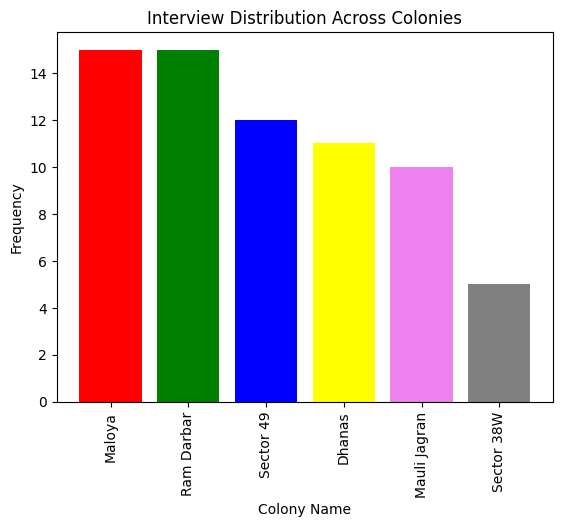

In [ ]:
frequency_counts = df['Place of current residence'].value_counts()
bar_colors = ['red', 'green', 'blue', 'yellow', 'violet', 'grey']

plt.bar(frequency_counts.index, frequency_counts.values, color=bar_colors)
plt.xlabel('Colony Name')
plt.ylabel('Frequency')
plt.title('Interview Distribution Across Colonies')
plt.xticks(rotation=90)
plt.show()


In [ ]:
frequency_counts = df['Sex'].value_counts()

# Step 2: Display the frequency counts
print(frequency_counts)

Male      43
Female    25
Name: Sex, dtype: int64


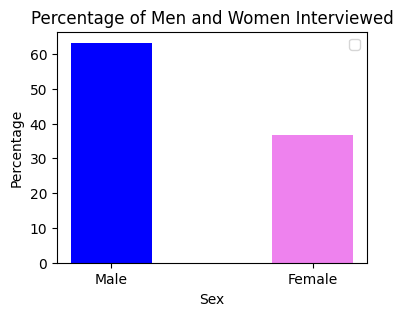

In [ ]:
import matplotlib.pyplot as plt

# Filter data for men
sex_data = df['Sex'].value_counts(normalize= True)*100
bar_colors = ['blue','violet']

# Create the bar plot
plt.figure(figsize=(4, 3))
plt.bar(sex_data.index, sex_data.values, width=0.4,color=bar_colors)
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.title('Percentage of Men and Women Interviewed')
plt.legend()

plt.show()

In [26]:
import pandas as pd

# Create a sample DataFrame
data = {
    'Country': ['USA', 'USA', 'USA', 'Canada', 'Canada', 'Canada', 'India', 'India', 'India'],
    'Age Group': ['18-25', '26-35', '36-45', '18-25', '26-35', '36-45', '18-25', '26-35', '36-45'],
    'Count': [100, 150, 200, 80, 120, 160, 60, 90, 120]
}

df3 = pd.DataFrame(data)

# Create a pivot table with age groups as columns and countries as rows
pivot_table = df3.pivot_table(columns='Country', index='Age Group', values='Count', aggfunc='sum', fill_value=0)

# Display the pivot table
print(pivot_table)

import pandas as pd

# Create a sample DataFrame
data = {
    'Country': ['USA', 'USA', 'USA', 'Canada', 'Canada', 'Canada', 'India', 'India', 'India'],
    'Age Group': ['18-25', '26-35', '36-45', '18-25', '26-35', '36-45', '18-25', '26-35', '36-45'],
    'Gender': ['Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female'],
    'Count': [100, 150, 200, 80, 120, 160, 60, 90, 120]
}

df3 = pd.DataFrame(data)

# Create a pivot table with age groups as columns, gender as columns, and countries as rows
pivot_table = df3.pivot_table(index=['Country', 'Gender'], columns='Age Group', values='Count', aggfunc='sum', fill_value=0)

# Reset the index to make 'Country' and 'Gender' as columns
pivot_table.reset_index(inplace=True)

# Display the pivot table
print(pivot_table)



Country    Canada  India  USA
Age Group                    
18-25          80     60  100
26-35         120     90  150
36-45         160    120  200
Age Group Country  Gender  18-25  26-35  36-45
0          Canada    Male     80    120    160
1           India  Female     60     90    120
2             USA    Male    100    150    200


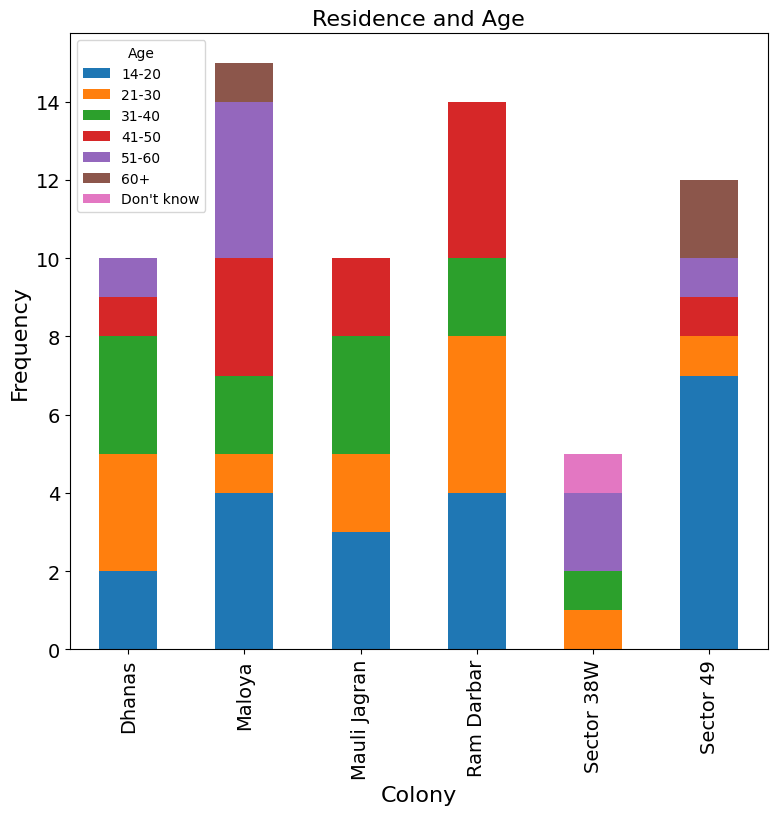

In [ ]:
grouped_data = df.groupby(['Place of current residence', 'Age']).size().unstack()

grouped_data.plot(kind='bar', stacked=True)
# Set labels and title
plt.xlabel('Colony',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.title('Residence and Age',fontsize=16)
plt.gcf().set_size_inches(9, 8)
plt.tick_params(axis='x', labelsize=14)  # You can adjust the fontsize (e.g., 14) as per your preference
plt.tick_params(axis='y', labelsize=14)  # You can adjust the fontsize (e.g., 14) as per your preference


plt.show()

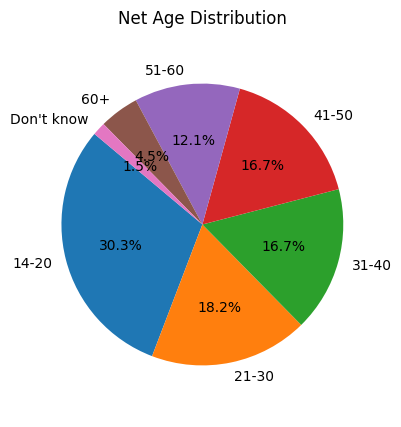

In [ ]:
value_counts = df['Age'].value_counts()

# Plot the pie chart
plt.figure(figsize=(4, 5))  # Adjust the figure size as per your preference
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)

# Add a title to the pie chart
plt.title('Net Age Distribution')

plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.show()


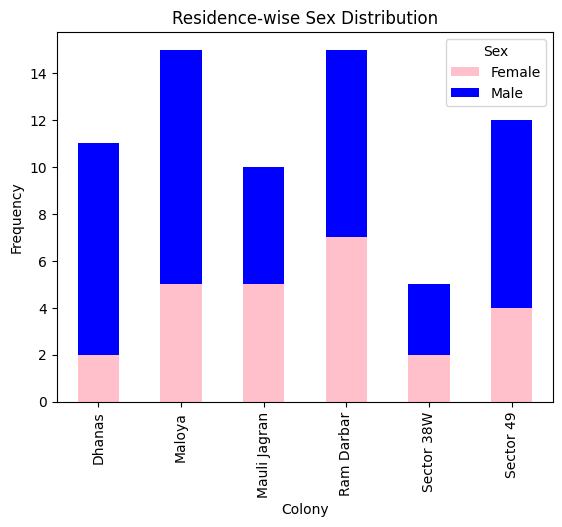

In [ ]:
grouped_data = df.groupby(['Place of current residence', 'Sex']).size().unstack()
colors = ['pink','blue' ]
grouped_data.plot(kind='bar', stacked=True, color=colors)
# Set labels and title
plt.xlabel('Colony')
plt.ylabel('Frequency')
plt.title('Residence-wise Sex Distribution')


plt.show()

graph - number distribution across colonies 5, gender distri -- totla and colony wise, age distri totol and colony wise

In [ ]:
df311= df[df['How satisfied are you with the services? (mostly for dispensaries)'].notna()]
df311

In [ ]:
df321=df311[df311['What was the nature of your movement?'].notna()]
df321

In [ ]:
df321['What was the nature of your movement?']

0      Voluntary
1         Forced
3         Forced
4         Forced
5         Forced
6         Forced
7     Don't know
9      Voluntary
18        Forced
21    Don't know
22    Don't know
26     Voluntary
27     Voluntary
28        Forced
29        Forced
33     Voluntary
34     Voluntary
36    Don't know
40    Don't know
41    Don't know
42        Forced
43    Don't know
44    Don't know
45    Don't know
46    Don't know
47    Don't know
48    Don't know
49        Forced
53    Don't know
54    Don't know
55    Don't know
56    Don't know
66        Forced
Name: What was the nature of your movement?, dtype: object

In [ ]:
df321['How satisfied are you with the services? (mostly for dispensaries)']

0          Not satisfied
1          Not satisfied
3          Not satisfied
4          Not satisfied
5          Not satisfied
6          Not satisfied
7          Not satisfied
9              Satisfied
18             Satisfied
21             Satisfied
22             Satisfied
26    Somewhat satisfied
27             Satisfied
28             Satisfied
29             Satisfied
33             Satisfied
34             Satisfied
36             Satisfied
40             Satisfied
41    Somewhat satisfied
42    Somewhat satisfied
43    Somewhat satisfied
44    Somewhat satisfied
45    Somewhat satisfied
46    Somewhat satisfied
47    Somewhat satisfied
48    Somewhat satisfied
49    Somewhat satisfied
53             Satisfied
54             Satisfied
55             Satisfied
56             Satisfied
66    Somewhat satisfied
Name: How satisfied are you with the services? (mostly for dispensaries), dtype: object

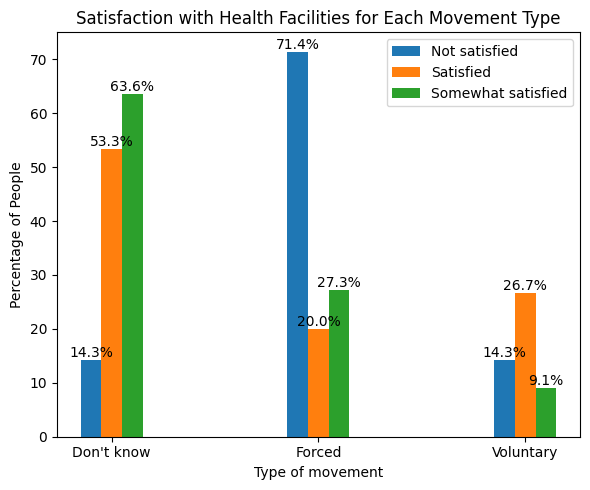

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

satisfaction_data = [
    'Not satisfied',
    'Not satisfied',
    'Not satisfied',
    'Not satisfied',
    'Not satisfied',
    'Not satisfied',
    'Not satisfied',
    'Satisfied',
    'Satisfied',
    'Satisfied',
    'Satisfied',
    'Somewhat satisfied',
    'Satisfied',
    'Satisfied',
    'Satisfied',
    'Satisfied',
    'Satisfied',
    'Satisfied',
    'Satisfied',
    'Somewhat satisfied',
    'Somewhat satisfied',
    'Somewhat satisfied',
    'Somewhat satisfied',
    'Somewhat satisfied',
    'Somewhat satisfied',
    'Somewhat satisfied',
    'Somewhat satisfied',
    'Somewhat satisfied',
    'Satisfied',
    'Satisfied',
    'Satisfied',
    'Satisfied',
    'Somewhat satisfied'
]

movement_data = [
    'Voluntary',
    'Forced',
    'Forced',
    'Forced',
    'Forced',
    'Forced',
    "Don't know",
    'Voluntary',
    'Forced',
    "Don't know",
    "Don't know",
    'Voluntary',
    'Voluntary',
    'Forced',
    'Forced',
    'Voluntary',
    'Voluntary',
    "Don't know",
    "Don't know",
    "Don't know",
    'Forced',
    "Don't know",
    "Don't know",
    "Don't know",
    "Don't know",
    "Don't know",
    "Don't know",
    'Forced',
    "Don't know",
    "Don't know",
    "Don't know",
    "Don't know",
    'Forced'
]


# Create a dictionary to store the counts of each combination
data_dict = {}
for i in range(len(movement_data)):
    key = (movement_data[i], satisfaction_data[i])
    data_dict[key] = data_dict.get(key, 0) + 1

# Extract unique movement types and traveling times
unique_movement_types = sorted(set(movement_data))
unique_traveling_times = sorted(set(satisfaction_data))

# Prepare the data for the grouped bar chart
data = np.zeros((len(unique_traveling_times), len(unique_movement_types)))

for i, tt in enumerate(unique_traveling_times):
    for j, mt in enumerate(unique_movement_types):
        data[i, j] = data_dict.get((mt, tt), 0)

total_counts_per_time = np.sum(data, axis=1)

# Calculate the percentage of people for each 'time of travel' for each type of movement
percentage_data_per_time = data / total_counts_per_time[:, np.newaxis] * 100

# Create the new grouped bar chart for percentages
fig, ax = plt.subplots(figsize = (6,5))
bar_width = 0.1
x = np.arange(len(unique_movement_types))

num_bars = len(unique_movement_types)
for i, mt in enumerate(unique_traveling_times):
    bars= ax.bar(x + i * ( bar_width), percentage_data_per_time[i, :], width=bar_width, label=mt)
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

plt.xlabel('Type of movement')
plt.ylabel('Percentage of People')
plt.title('Satisfaction with Health Facilities for Each Movement Type')
plt.xticks(x +(num_bars - 1) * (bar_width) / 2 , unique_movement_types)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df211= df[df['Are you satisfied with the quality of education?'].notna()]
df211

In [ ]:
df221= df211[df211['What was the nature of your movement?'].notna()]
df221

In [ ]:
df221['What was the nature of your movement?']

In [ ]:
df221['Are you satisfied with the quality of education?']

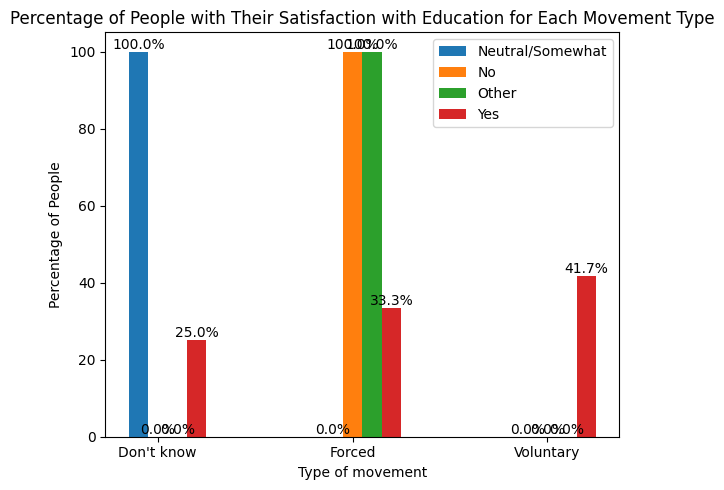

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

satisfaction_data = [
    'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Neutral/Somewhat', 'Neutral/Somewhat',
    'Yes', 'Yes', 'Yes', 'Yes', 'Other', 'Yes', 'Yes', 'Yes', 'No', 'Neutral/Somewhat',
    'Neutral/Somewhat', 'Neutral/Somewhat', 'Neutral/Somewhat', 'Yes', 'No', 'Yes'
]

movement_data = [
    'Forced', 'Forced', 'Forced', 'Forced', "Don't know", 'Voluntary', 'Forced', "Don't know",
    "Don't know", 'Forced', 'Voluntary', 'Voluntary', 'Forced', 'Forced', 'Voluntary',
    'Voluntary', "Don't know", 'Forced', "Don't know", "Don't know", "Don't know", "Don't know",
    "Don't know", 'Forced', 'Forced'
]

# Create a dictionary to store the counts of each combination
data_dict = {}
for i in range(len(movement_data)):
    key = (movement_data[i], satisfaction_data[i])
    data_dict[key] = data_dict.get(key, 0) + 1

# Extract unique movement types and traveling times
unique_movement_types = sorted(set(movement_data))
unique_traveling_times = sorted(set(satisfaction_data))

# Prepare the data for the grouped bar chart
data = np.zeros((len(unique_traveling_times), len(unique_movement_types)))

for i, tt in enumerate(unique_traveling_times):
    for j, mt in enumerate(unique_movement_types):
        data[i, j] = data_dict.get((mt, tt), 0)

total_counts_per_time = np.sum(data, axis=1)

# Calculate the percentage of people for each 'time of travel' for each type of movement
percentage_data_per_time = data / total_counts_per_time[:, np.newaxis] * 100

# Create the new grouped bar chart for percentages
fig, ax = plt.subplots(figsize = (6,5))
bar_width = 0.1
x = np.arange(len(unique_movement_types))

num_bars = len(unique_movement_types)
for i, mt in enumerate(unique_traveling_times):
    bars= ax.bar(x + i * ( bar_width), percentage_data_per_time[i, :], width=bar_width, label=mt)
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

plt.xlabel('Type of movement')
plt.ylabel('Percentage of People')
plt.title('Percentage of People with Their Satisfaction with Education for Each Movement Type')
plt.xticks(x +(num_bars - 1) * (bar_width) / 2 , unique_movement_types)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df21= df[df['If given a chance, would you retrace your steps and go back to your previous location?'].notna()]
df21

,Place of current residence,Sex,Age,Religion,Place of birth,Level of Education,Since when do you live here?(years),Job Sector,Do you earn a fixed salary or a daily wage?,What is the distance between your home and your workplace?,...,How is the law and order situation (mahaul) compared to where you lived before?,Do you feel safe to walk alone at night in your community?,Does the street lighting work?,How are your relations with your neighbours?,If you have any small illnesses where do you get them treated?,How satisfied are you with the services? (mostly for dispensaries),What was the nature of your movement?,How they are viewed changed or not?,How they view people has changed,"If given a chance, would you retrace your steps and go back to your previous location?"
1,Maloya,Male,21-30,Hindu,Inside Chandigarh,10th pass,3.50,Informal,Fixed salary,15 - 30 minutes,...,NaN,NaN,Yes,Neutral,Clinic/Dispensary,Not satisfied,Forced,Yes (-ve),Yes (-ve),Yes
2,Maloya,Male,14-20,Hindu,Inside Chandigarh,8th pass,3.50,Informal,Fixed salary,15 - 30 minutes,...,NaN,NaN,Yes,Neutral,NaN,NaN,Forced,NaN,NaN,Yes
3,Maloya,Female,41-50,Hindu,NaN,Not educated,5.00,Unemployed,NaN,NaN,...,Same,NaN,Yes,Good,Clinic/Dispensary,Not satisfied,Forced,NaN,NaN,Yes
4,Maloya,Female,60+,Hindu,Inside Chandigarh,Not educated,5.00,Unemployed,NaN,NaN,...,Same,NaN,Yes,Good,Clinic/Dispensary,Not satisfied,Forced,NaN,NaN,Yes
5,Maloya,Female,51-60,Hindu,NaN,Not educated,5.00,Unemployed,NaN,NaN,...,Same,NaN,Yes,Good,Clinic/Dispensary,Not satisfied,Forced,NaN,NaN,Yes
6,Maloya,Female,51-60,Hindu,NaN,Not educated,5.00,Unemployed,NaN,NaN,...,Same,NaN,Yes,Good,Clinic/Dispensary,Not satisfied,Forced,NaN,NaN,Yes
17,Sector 49,Female,41-50,Not mentioned,NaN,NaN,11.00,Informal,Daily wage,NaN,...,NaN,NaN,NaN,Bad,Clinic/Dispensary,NaN,Voluntary,NaN,NaN,Yes
21,Mauli Jagran 2/Sundarnagar,Male,14-20,None,Inside Chandigarh,10th pass,8.00,Student,NaN,NaN,...,Don't know,Somewhat,Yes,NaN,Private clinic,Satisfied,Don't know,Yes (+ve),NaN,No
22,Mauli Jagran 2/Sundarnagar,Male,14-20,None,Inside Chandigarh,8th pass,6.00,Student,NaN,NaN,...,Don't know,Somewhat,Yes,Bad,Chemist,Satisfied,Don't know,NaN,NaN,Yes
23,Mauli Jagran 2/Sundarnagar,Male,21-30,Hindu,Inside Chandigarh,College,5.50,Formal,Fixed salary,< 15 minutes,...,Worse,Yes,NaN,Neutral,Clinic/Dispensary,NaN,Forced,No,NaN,No


In [ ]:
df22= df21[df21['What was the nature of your movement?'].notna()]
df22

,Place of current residence,Sex,Age,Religion,Place of birth,Level of Education,Since when do you live here?(years),Job Sector,Do you earn a fixed salary or a daily wage?,What is the distance between your home and your workplace?,...,How is the law and order situation (mahaul) compared to where you lived before?,Do you feel safe to walk alone at night in your community?,Does the street lighting work?,How are your relations with your neighbours?,If you have any small illnesses where do you get them treated?,How satisfied are you with the services? (mostly for dispensaries),What was the nature of your movement?,How they are viewed changed or not?,How they view people has changed,"If given a chance, would you retrace your steps and go back to your previous location?"
1,Maloya,Male,21-30,Hindu,Inside Chandigarh,10th pass,3.50,Informal,Fixed salary,15 - 30 minutes,...,NaN,NaN,Yes,Neutral,Clinic/Dispensary,Not satisfied,Forced,Yes (-ve),Yes (-ve),Yes
2,Maloya,Male,14-20,Hindu,Inside Chandigarh,8th pass,3.50,Informal,Fixed salary,15 - 30 minutes,...,NaN,NaN,Yes,Neutral,NaN,NaN,Forced,NaN,NaN,Yes
3,Maloya,Female,41-50,Hindu,NaN,Not educated,5.00,Unemployed,NaN,NaN,...,Same,NaN,Yes,Good,Clinic/Dispensary,Not satisfied,Forced,NaN,NaN,Yes
4,Maloya,Female,60+,Hindu,Inside Chandigarh,Not educated,5.00,Unemployed,NaN,NaN,...,Same,NaN,Yes,Good,Clinic/Dispensary,Not satisfied,Forced,NaN,NaN,Yes
5,Maloya,Female,51-60,Hindu,NaN,Not educated,5.00,Unemployed,NaN,NaN,...,Same,NaN,Yes,Good,Clinic/Dispensary,Not satisfied,Forced,NaN,NaN,Yes
6,Maloya,Female,51-60,Hindu,NaN,Not educated,5.00,Unemployed,NaN,NaN,...,Same,NaN,Yes,Good,Clinic/Dispensary,Not satisfied,Forced,NaN,NaN,Yes
17,Sector 49,Female,41-50,Not mentioned,NaN,NaN,11.00,Informal,Daily wage,NaN,...,NaN,NaN,NaN,Bad,Clinic/Dispensary,NaN,Voluntary,NaN,NaN,Yes
21,Mauli Jagran 2/Sundarnagar,Male,14-20,None,Inside Chandigarh,10th pass,8.00,Student,NaN,NaN,...,Don't know,Somewhat,Yes,NaN,Private clinic,Satisfied,Don't know,Yes (+ve),NaN,No
22,Mauli Jagran 2/Sundarnagar,Male,14-20,None,Inside Chandigarh,8th pass,6.00,Student,NaN,NaN,...,Don't know,Somewhat,Yes,Bad,Chemist,Satisfied,Don't know,NaN,NaN,Yes
23,Mauli Jagran 2/Sundarnagar,Male,21-30,Hindu,Inside Chandigarh,College,5.50,Formal,Fixed salary,< 15 minutes,...,Worse,Yes,NaN,Neutral,Clinic/Dispensary,NaN,Forced,No,NaN,No


In [ ]:
df22['What was the nature of your movement?']

1         Forced
2         Forced
3         Forced
4         Forced
5         Forced
6         Forced
17     Voluntary
21    Don't know
22    Don't know
23        Forced
24        Forced
25        Forced
26     Voluntary
27     Voluntary
28        Forced
29        Forced
36    Don't know
40    Don't know
42        Forced
43    Don't know
44    Don't know
45    Don't know
46    Don't know
47    Don't know
48    Don't know
49        Forced
53    Don't know
54    Don't know
55    Don't know
56    Don't know
58     Voluntary
66        Forced
Name: What was the nature of your movement?, dtype: object

In [ ]:
df22['If given a chance, would you retrace your steps and go back to your previous location?']

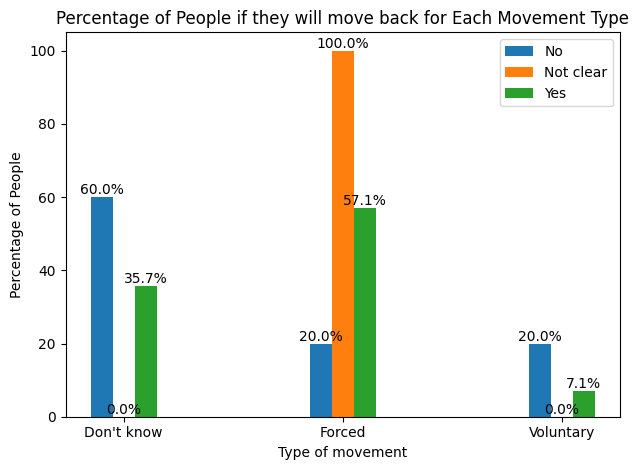

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

given_chance_data = [
    'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No',
    'No', 'Not clear', 'Not clear', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
    'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Not clear'
]

movement_data = [
    'Forced', 'Forced', 'Forced', 'Forced', 'Forced', 'Forced', 'Voluntary', "Don't know",
    "Don't know", 'Forced', 'Forced', 'Forced', 'Voluntary', 'Voluntary', 'Forced', 'Forced',
    "Don't know", "Don't know", 'Forced', "Don't know", "Don't know", "Don't know", "Don't know",
    "Don't know", "Don't know", 'Forced', "Don't know", "Don't know", "Don't know", "Don't know",
    'Voluntary', 'Forced'
]

# Create a dictionary to store the counts of each combination
data_dict = {}
for i in range(len(movement_data)):
    key = (movement_data[i], given_chance_data[i])
    data_dict[key] = data_dict.get(key, 0) + 1

# Extract unique movement types and traveling times
unique_movement_types = sorted(set(movement_data))
unique_traveling_times = sorted(set(given_chance_data))

# Prepare the data for the grouped bar chart
data = np.zeros((len(unique_traveling_times), len(unique_movement_types)))

for i, tt in enumerate(unique_traveling_times):
    for j, mt in enumerate(unique_movement_types):
        data[i, j] = data_dict.get((mt, tt), 0)

total_counts_per_time = np.sum(data, axis=1)

# Calculate the percentage of people for each 'time of travel' for each type of movement
percentage_data_per_time = data / total_counts_per_time[:, np.newaxis] * 100

# Create the new grouped bar chart for percentages
fig, ax = plt.subplots()
bar_width = 0.1
x = np.arange(len(unique_movement_types))

num_bars = len(unique_movement_types)
for i, mt in enumerate(unique_traveling_times):
    bars= ax.bar(x + i * ( bar_width), percentage_data_per_time[i, :], width=bar_width, label=mt)
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

plt.xlabel('Type of movement')
plt.ylabel('Percentage of People')
plt.title('Percentage of People if they will move back for Each Movement Type')
plt.xticks(x +(num_bars - 1) * (bar_width) / 2 , unique_movement_types)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df11= df[df['Level of Education'].notna()]
df11

In [ ]:
df12= df11[df11['What was the nature of your movement?'].notna()]
df12

In [ ]:
df12['What was the nature of your movement?']

In [ ]:
df12['Level of Education']

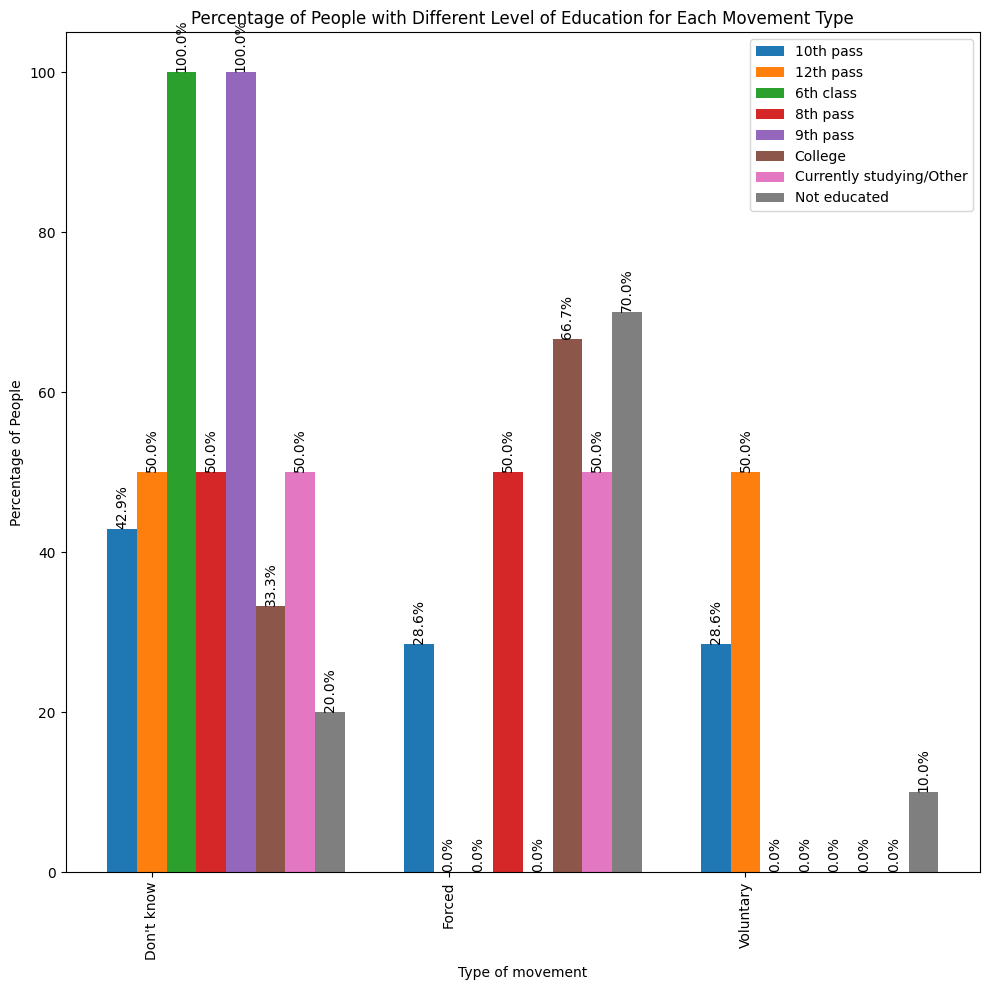

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

education_data = [
    'Not educated', '10th pass', '8th pass', 'Not educated', 'Not educated', 'Not educated',
    'Not educated', 'Not educated', 'College', '10th pass', '8th pass', '10th pass', '8th pass',
    'College', 'Not educated', '12th pass', '10th pass', 'Currently studying/Other',
    'Not educated', '9th pass', '6th class', 'College', '10th pass', '10th pass',
    'Currently studying/Other', '8th pass', 'Not educated', '12th pass', 'Not educated',
    '10th pass'
]

movement_data = [
    'Voluntary', 'Forced', 'Forced', 'Forced', 'Forced', 'Forced', 'Forced', "Don't know",
    'Forced', 'Forced', 'Forced', "Don't know", "Don't know", 'Forced', 'Forced',
    'Voluntary', 'Voluntary', 'Forced', 'Forced', "Don't know", "Don't know", "Don't know",
    "Don't know", "Don't know", "Don't know", "Don't know", 'Forced', "Don't know",
    "Don't know", 'Voluntary'
]

# Create a dictionary to store the counts of each combination
data_dict = {}
for i in range(len(movement_data)):
    key = (movement_data[i], education_data[i])
    data_dict[key] = data_dict.get(key, 0) + 1

# Extract unique movement types and traveling times
unique_movement_types = sorted(set(movement_data))
unique_traveling_times = sorted(set(education_data))

# Prepare the data for the grouped bar chart
data = np.zeros((len(unique_traveling_times), len(unique_movement_types)))

for i, tt in enumerate(unique_traveling_times):
    for j, mt in enumerate(unique_movement_types):
        data[i, j] = data_dict.get((mt, tt), 0)

total_counts_per_time = np.sum(data, axis=1)

# Calculate the percentage of people for each 'time of travel' for each type of movement
percentage_data_per_time = data / total_counts_per_time[:, np.newaxis] * 100

# Create the new grouped bar chart for percentages
fig, ax = plt.subplots(figsize=(10, 10))
bar_width = 0.1
x = np.arange(len(unique_movement_types))

num_bars = len(unique_movement_types)
for i, mt in enumerate(unique_traveling_times):
    bars= ax.bar(x + i * ( bar_width), percentage_data_per_time[i, :], width=bar_width, label=mt)
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom', rotation=90)

plt.xlabel('Type of movement')
plt.ylabel('Percentage of People')
plt.title('Percentage of People with Different Level of Education for Each Movement Type')
plt.xticks(x +(num_bars - 1) * (bar_width) / 2 , unique_movement_types,  rotation='vertical')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
dfnew = df[df['What is the distance between your home and your workplace?'].notna()]
dfnew

In [ ]:
df2new = dfnew[dfnew['What was the nature of your movement?'].notna()]
df2new

In [ ]:
df2new['What was the nature of your movement?']

In [ ]:
df2new['What is the distance between your home and your workplace?']

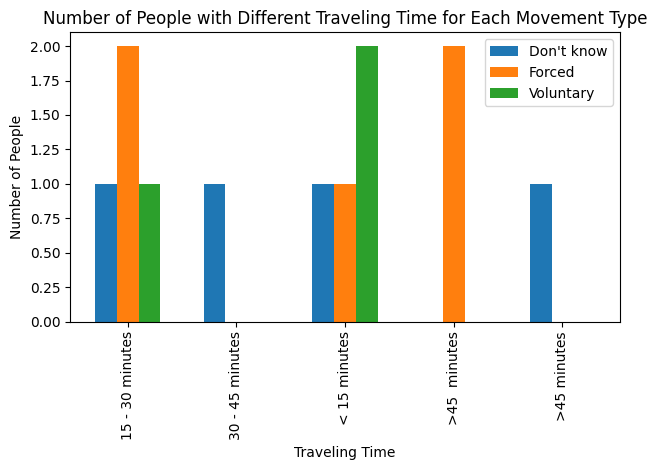

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Provided data
movement_data = [
    '< 15 minutes', '15 - 30 minutes', '15 - 30 minutes', '>45 minutes', '< 15 minutes',
    '15 - 30 minutes', '>45  minutes', '>45  minutes', '< 15 minutes', '15 - 30 minutes',
    '30 - 45 minutes', '< 15 minutes'
]

movement_type_data = [
    'Voluntary', 'Forced', 'Forced', "Don't know", 'Forced', 'Voluntary', 'Forced',
    'Forced', "Don't know", "Don't know", "Don't know", 'Voluntary'
]

# Create a dictionary to store the counts of each combination
data_dict = {}
for i in range(len(movement_data)):
    key = (movement_data[i], movement_type_data[i])
    data_dict[key] = data_dict.get(key, 0) + 1

# Extract unique movement types and traveling times
unique_movement_types = sorted(set(movement_type_data))
unique_traveling_times = sorted(set(movement_data))

# Prepare the data for the grouped bar chart
data = np.zeros((len(unique_movement_types), len(unique_traveling_times)))

for i, mt in enumerate(unique_movement_types):
    for j, tt in enumerate(unique_traveling_times):
        data[i, j] = data_dict.get((tt, mt), 0)

# Create the grouped bar chart
fig, ax = plt.subplots()
bar_width = 0.2
x = np.arange(len(unique_traveling_times))

for i, mt in enumerate(unique_movement_types):
    ax.bar(x + i * bar_width, data[i], width=bar_width, label=mt)

plt.xlabel('Traveling Time')
plt.ylabel('Number of People')
plt.title('Number of People with Different Traveling Time for Each Movement Type')
plt.xticks(x + bar_width * (len(unique_movement_types) - 1) / 2, unique_traveling_times, rotation='vertical')
plt.legend()
plt.tight_layout()
plt.show()


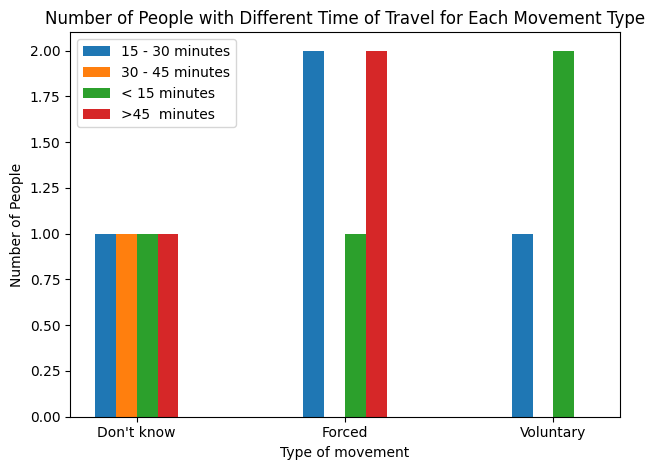

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Provided data
movement_data = [
    '< 15 minutes', '15 - 30 minutes', '15 - 30 minutes', '>45  minutes', '< 15 minutes',
    '15 - 30 minutes', '>45  minutes', '>45  minutes', '< 15 minutes', '15 - 30 minutes',
    '30 - 45 minutes', '< 15 minutes'
]

movement_type_data = [
    'Voluntary', 'Forced', 'Forced', "Don't know", 'Forced', 'Voluntary', 'Forced',
    'Forced', "Don't know", "Don't know", "Don't know", 'Voluntary'
]

# Create a dictionary to store the counts of each combination
data_dict = {}
for i in range(len(movement_type_data)):
    key = (movement_type_data[i], movement_data[i])
    data_dict[key] = data_dict.get(key, 0) + 1

# Extract unique movement types and traveling times
unique_movement_types = sorted(set(movement_type_data))
unique_traveling_times = sorted(set(movement_data))

# Prepare the data for the grouped bar chart
data = np.zeros((len(unique_traveling_times), len(unique_movement_types)))

for i, tt in enumerate(unique_traveling_times):
    for j, mt in enumerate(unique_movement_types):
        data[i, j] = data_dict.get((mt, tt), 0)

# Create the grouped bar chart
fig, ax = plt.subplots()
bar_width = 0.1
x = np.arange(len(unique_movement_types))

for i, mt in enumerate(unique_traveling_times):
    ax.bar(x + i * bar_width, data[i, :], width=bar_width, label=mt)



plt.xlabel('Type of movement')
plt.ylabel('Number of People')
plt.title('Number of People with Different Time of Travel for Each Movement Type')
plt.xticks(x + bar_width * (len(unique_traveling_times) - 1) / 2, unique_movement_types)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

movement_data = [
    '< 15 minutes', '15 - 30 minutes', '15 - 30 minutes', '>45  minutes', '< 15 minutes',
    '15 - 30 minutes', '>45  minutes', '>45  minutes', '< 15 minutes', '15 - 30 minutes',
    '30 - 45 minutes', '< 15 minutes'
]

movement_type_data = [
    'Voluntary', 'Forced', 'Forced', "Don't know", 'Forced', 'Voluntary', 'Forced',
    'Forced', "Don't know", "Don't know", "Don't know", 'Voluntary'
]

# Create a dictionary to store the counts of each combination
data_dict = {}
for i in range(len(movement_type_data)):
    key = (movement_type_data[i], movement_data[i])
    data_dict[key] = data_dict.get(key, 0) + 1

# Extract unique movement types and traveling times
unique_movement_types = sorted(set(movement_type_data))
unique_traveling_times = sorted(set(movement_data))

# Prepare the data for the grouped bar chart
data = np.zeros((len(unique_traveling_times), len(unique_movement_types)))

for i, tt in enumerate(unique_traveling_times):
    for j, mt in enumerate(unique_movement_types):
        data[i, j] = data_dict.get((mt, tt), 0)

total_counts_per_time = np.sum(data, axis=1)

# Calculate the percentage of people for each 'time of travel' for each type of movement
percentage_data_per_time = data / total_counts_per_time[:, np.newaxis] * 100


percentage_data_per_time

array([[ 25.        ,  50.        ,  25.        ],
       [100.        ,   0.        ,   0.        ],
       [ 25.        ,  25.        ,  50.        ],
       [ 33.33333333,  66.66666667,   0.        ]])

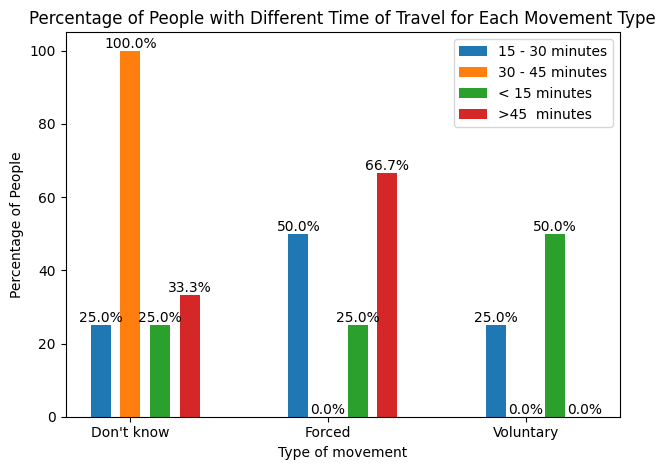

In [ ]:
# Create the new grouped bar chart for percentages
fig, ax = plt.subplots()
bar_width = 0.1
x = np.arange(len(unique_movement_types))

num_bars = len(unique_movement_types)
spacing = 0.05
for i, mt in enumerate(unique_traveling_times):
    bars= ax.bar(x + i * (spacing + bar_width), percentage_data_per_time[i, :], width=bar_width, label=mt)
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

plt.xlabel('Type of movement')
plt.ylabel('Percentage of People')
plt.title('Percentage of People with Different Time of Travel for Each Movement Type')
plt.xticks(x +(num_bars - 1) * (bar_width + spacing) / 2 , unique_movement_types)
plt.legend()
plt.tight_layout()
plt.show()

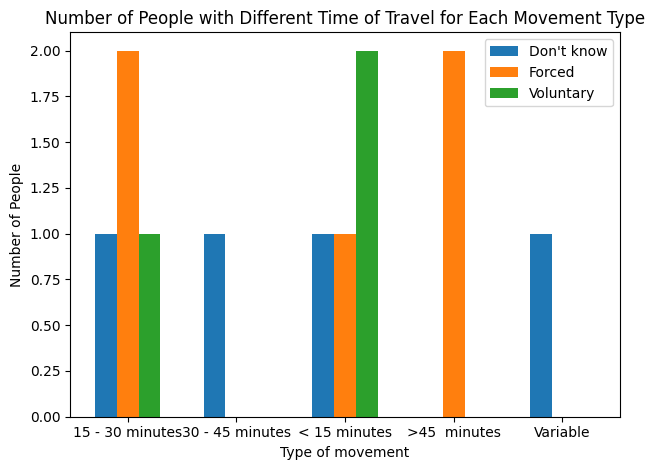

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Provided data
movement_data = [
    '< 15 minutes', '15 - 30 minutes', '15 - 30 minutes', 'Variable', '< 15 minutes',
    '15 - 30 minutes', '>45  minutes', '>45  minutes', '< 15 minutes', '15 - 30 minutes',
    '30 - 45 minutes', '< 15 minutes'
]

movement_type_data = [
    'Voluntary', 'Forced', 'Forced', "Don't know", 'Forced', 'Voluntary', 'Forced',
    'Forced', "Don't know", "Don't know", "Don't know", 'Voluntary'
]

# Create a dictionary to store the counts of each combination
data_dict = {}
for i in range(len(movement_type_data)):
    key = (movement_type_data[i], movement_data[i])
    data_dict[key] = data_dict.get(key, 0) + 1

# Extract unique movement types and traveling times
unique_movement_types = sorted(set(movement_type_data))
unique_traveling_times = sorted(set(movement_data))

# Prepare the data for the grouped bar chart
data = np.zeros((len(unique_traveling_times), len(unique_movement_types)))

for i, tt in enumerate(unique_traveling_times):
    for j, mt in enumerate(unique_movement_types):
        data[i, j] = data_dict.get((mt, tt), 0)

# Create the grouped bar chart
fig, ax = plt.subplots()
bar_width = 0.2
x = np.arange(len(unique_traveling_times))

for i, mt in enumerate(unique_movement_types):
    ax.bar(x + i * bar_width, data[:, i], width=bar_width, label=mt)

plt.xlabel('Type of movement')
plt.ylabel('Number of People')
plt.title('Number of People with Different Time of Travel for Each Movement Type')
plt.xticks(x + bar_width * (len(unique_movement_types) - 1) / 2, unique_traveling_times)
plt.legend()
plt.tight_layout()
plt.show()


NameError: ignored

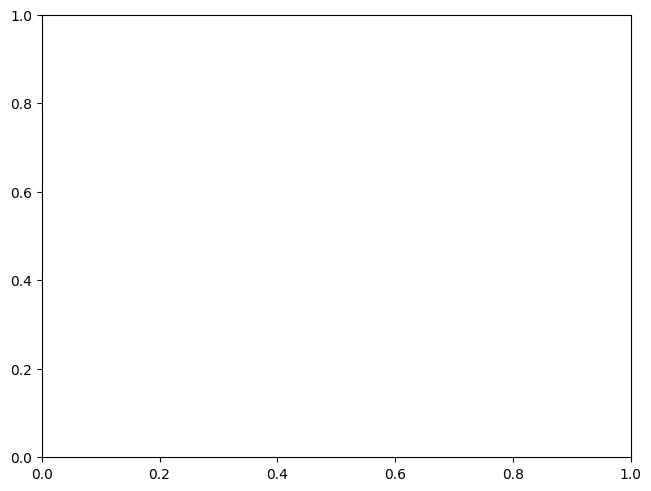

In [ ]:
# species = ("Adelie", "Chinstrap", "Gentoo")
# penguin_means = {
#     'Bill Depth': (18.35, 18.43, 14.98),
#     'Bill Length': (38.79, 48.83, 47.50),
#     'Flipper Length': (189.95, 195.82, 217.19),
# }


male_data = df2new[df2new['Sex'] == 'Male']
male_residence_percentage = male_data['What was the nature of your movement?'].value_counts(normalize=True) * 100

female_data = df[df['Sex'] == 'Female']
female_residence_percentage = female_data['What was the nature of your movement?'].value_counts(normalize=True) * 100

male_data = df[df['Sex'] == 'Male']
male_residence_percentage = male_data['What was the nature of your movement?'].value_counts(normalize=True) * 100


x = np.arange(len(male_residence_percentage))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

In [ ]:
# Filter data for each gender
male_data = df2new[df2new['What is the distance between your home and your workplace?'] == '< 15 minutes']
female_data = df2new[df2new['What is the distance between your home and your workplace?'] == '15 - 30 minutes']
non_binary_data = df2new[df2new['What is the distance between your home and your workplace?'] == '30 - 45 minutes']
other_data = df2new[df2new['What is the distance between your home and your workplace?'] == '>45 minutes']

# Filter data for each gender
male_residence_percentage = male_data['What was the nature of your movement?'].value_counts(normalize=True) * 100

female_residence_percentage = female_data['What was the nature of your movement?'].value_counts(normalize=True) * 100

non_binary_residence_percentage = non_binary_data['What was the nature of your movement?'].value_counts(normalize=True) * 100

other_residence_percentage = other_data['What was the nature of your movement?'].value_counts(normalize=True) * 100

# Define the width of each bar
bar_width = 0.2

# Create the x-axis positions for the bars
x = np.arange(len(male_residence_percentage))

# Create the bar plot
fig, ax = plt.subplots()
ax.bar(x - 1.5*bar_width, male_residence_percentage, width=bar_width, label='Men')
ax.bar(x - 0.5*bar_width, female_residence_percentage, width=bar_width, label='Women')
ax.bar(x + 0.5*bar_width, non_binary_residence_percentage, width=bar_width, label='Non-binary')
ax.bar(x + 1.5*bar_width, other_residence_percentage, width=bar_width, label='Other')

plt.xlabel('Movement')
plt.ylabel('Percentage')
plt.title('Movement Types for Different Distances')
plt.legend()

# Add percentage labels to the top of each bar
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Adjust x-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels(male_residence_percentage.index)

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Filter data for men
male_data = df[df['Sex'] == 'Male']
male_residence_percentage = male_data['What was the nature of your movement?'].value_counts(normalize=True) * 100

# Filter data for women
female_data = df[df['Sex'] == 'Female']
female_residence_percentage = female_data['What was the nature of your movement?'].value_counts(normalize=True) * 100

# Define the width of each bar
bar_width = 0.35

# Create the x-axis positions for the bars
x = np.arange(len(male_residence_percentage))

# Create the bar plot
fig, ax = plt.subplots()
ax.bar(x - bar_width/2, male_residence_percentage, width=bar_width, label='Men')
ax.bar(x + bar_width/2, female_residence_percentage, width=bar_width, label='Women')

plt.xlabel('Movement')
plt.ylabel('Percentage')
plt.title(' Men and Women and Movement_Type')
plt.legend()

# Add percentage labels to the top of each bar
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Adjust x-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels(male_residence_percentage.index)

plt.show()


In [ ]:
df2 = df[df['What was the nature of your movement?'].notna()]

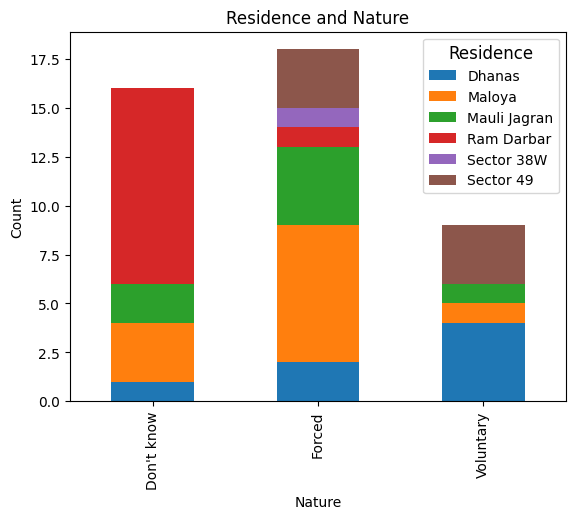

In [ ]:
grouped_data = df.groupby(['What was the nature of your movement?', 'Place of current residence']).size().unstack()


# Plotting the grouped chart
grouped_data.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Nature')
plt.ylabel('Count')
plt.title('Residence and Nature')

legend=plt.legend(title='Residence')
legend.get_title().set_fontsize('12')

plt.show()

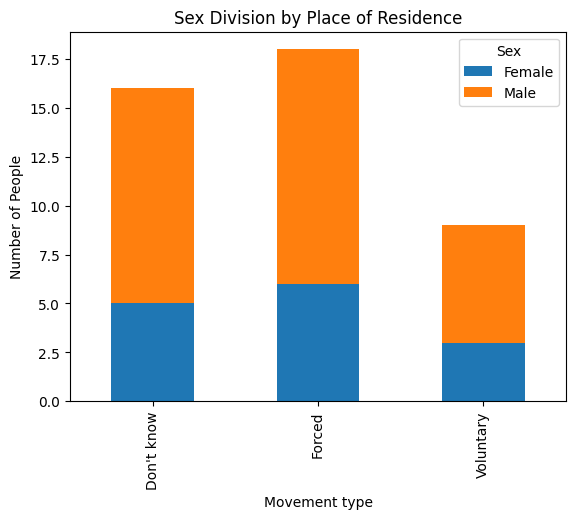

In [ ]:
grouped_data = df2.groupby(['What was the nature of your movement?', 'Sex']).size().unstack()

# Plotting the clustered chart
grouped_data.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Movement type')
plt.ylabel('Number of People')
plt.title('Sex Division by Place of Residence')

# Show the plot
plt.show()

In [ ]:
df2.plot(x="What was the nature of your movement?", y=["Percentage1", "Percentage2"], kind="bar")

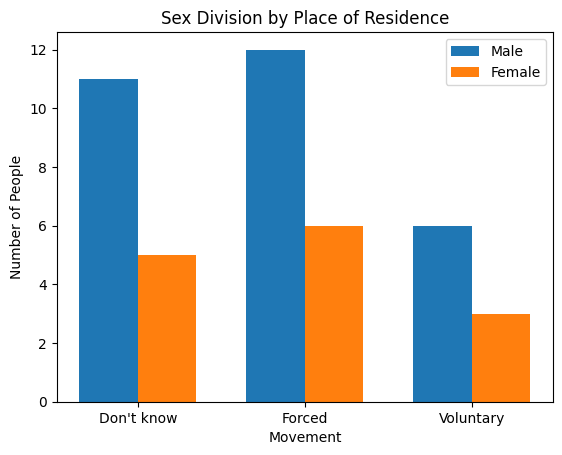

In [ ]:
# Get the unique places of residence
residences = grouped_data.index

# Set the width of each bar
bar_width = 0.35

# Create an array of indices for the x-axis ticks
ind = np.arange(len(residences))

# Plotting the clustered chart
fig, ax = plt.subplots()
male_bars = ax.bar(ind, grouped_data['Male'], width=bar_width, label='Male')
female_bars = ax.bar(ind + bar_width, grouped_data['Female'], width=bar_width, label='Female')

# Add labels and title
ax.set_xlabel('Movement')
ax.set_ylabel('Number of People')
ax.set_title('Sex Division by Place of Residence')

# Set the x-axis ticks and labels
ax.set_xticks(ind + bar_width / 2)
ax.set_xticklabels(residences)

# Add a legend
ax.legend()

# Show the plot
plt.show()

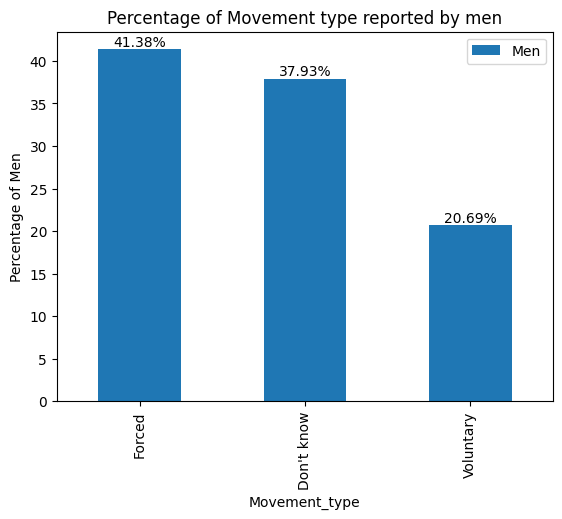

In [ ]:
subset_male = df2[df2['Sex'] == 'Male']
residence_percentage = subset_male['What was the nature of your movement?'].value_counts(normalize=True) * 100
ax= residence_percentage.plot(kind='bar')

plt.xlabel('Movement_type')
plt.ylabel('Percentage of Men')
plt.title('Percentage of Movement type reported by men')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.legend(['Men'])

plt.show()

In [ ]:
subset_male = df2[df2['Sex'] == 'Female']
residence_percentage = subset_male['What was the nature of your movement?'].value_counts(normalize=True) * 100
ax= residence_percentage.plot(kind='bar')

plt.xlabel('Movement_type')
plt.ylabel('Percentage of Women')
plt.title('Percentage of Movement type reported by Women')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.legend(['Women'])

plt.show()

In [ ]:
maloya_male = df2[df2['Place of current residence'] == 'Maloya']
residence_percentage = maloya_male['What was the nature of your movement?'].value_counts(normalize=True) * 100
ax= residence_percentage.plot(kind='bar')

plt.xlabel('Movement_type')
plt.ylabel('Percentage')
plt.title('Percentage of Movement type in Maloya')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

In [ ]:
rd_data = df2[df2['Place of current residence'] == 'Ram Darbar']
residence_percentage = rd_data['What was the nature of your movement?'].value_counts(normalize=True) * 100
ax= residence_percentage.plot(kind='bar')

plt.xlabel('Movement_type')
plt.ylabel('Percentage')
plt.title('Percentage of Movement type in Ram Darbar')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

In [ ]:
maloya_male = df2[df2['Place of current residence'] == 'Sector 49']
residence_percentage = maloya_male['What was the nature of your movement?'].value_counts(normalize=True) * 100
ax= residence_percentage.plot(kind='bar')

plt.xlabel('Movement_type')
plt.ylabel('Percentage')
plt.title('Percentage of Movement type in Sec49')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

In [ ]:
maloya_male = df2[df2['Place of current residence'] == 'Sector 38W']
residence_percentage = maloya_male['What was the nature of your movement?'].value_counts(normalize=True) * 100
ax= residence_percentage.plot(kind='bar')

plt.xlabel('Movement_type')
plt.ylabel('Percentage')
plt.title('Percentage of Movement type in Sec38')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

In [ ]:
maloya_male = df2[df2['Place of current residence'] == 'Dhanas']
residence_percentage = maloya_male['What was the nature of your movement?'].value_counts(normalize=True) * 100
ax= residence_percentage.plot(kind='bar')

plt.xlabel('Movement_type')
plt.ylabel('Percentage')
plt.title('Percentage of Movement type in Dhanas')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

In [ ]:
maloya_male = df2[df2['Place of current residence'] == 'Mauli Jagran 2/Sundarnagar']
residence_percentage = maloya_male['What was the nature of your movement?'].value_counts(normalize=True) * 100
ax= residence_percentage.plot(kind='bar')

plt.xlabel('Movement_type')
plt.ylabel('Percentage')
plt.title('Percentage of Movement type in Mauli Jagran')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

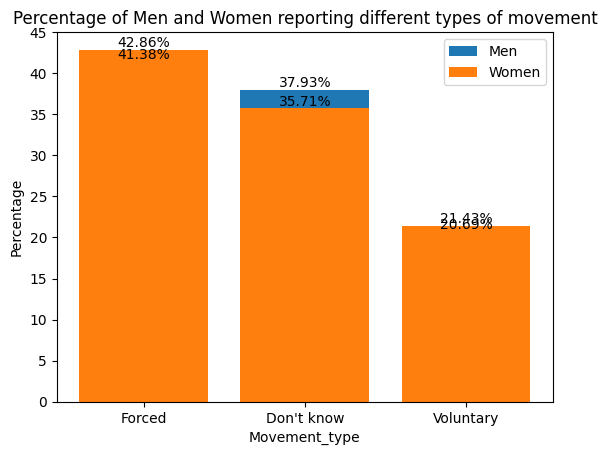

In [ ]:
import matplotlib.pyplot as plt

# Filter data for men
male_data = df[df['Sex'] == 'Male']
male_residence_percentage = male_data['What was the nature of your movement?'].value_counts(normalize=True) * 100

# Filter data for women
female_data = df[df['Sex'] == 'Female']
female_residence_percentage = female_data['What was the nature of your movement?'].value_counts(normalize=True) * 100

# Create the bar plot
ax = plt.subplot(111)
ax.bar(male_residence_percentage.index, male_residence_percentage.values, label='Men')
ax.bar(female_residence_percentage.index, female_residence_percentage.values, label='Women')

plt.xlabel('Movement_type')
plt.ylabel('Percentage')
plt.title('Percentage of Men and Women reporting different types of movement')
plt.legend()

# Add percentage labels to the top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


In [ ]:
# error is mainly in the number of bars that need to be combined -- geometrical errors


import numpy as np
import matplotlib.pyplot as plt

# Filter data for men
maloya_data = df[df['Place of current residence'] == 'Maloya']
male_residence_percentage = maloya_data['What was the nature of your movement?'].value_counts(normalize=True) * 100

# Filter data for women
Dhanas_data = df[df['Place of current residence'] == 'Dhanas']
female_residence_percentage = Dhanas_data['What was the nature of your movement?'].value_counts(normalize=True) * 100

# Filter data for women
sec38_data = df[df['Place of current residence'] == 'Sector 38W']
a_residence_percentage = sec38_data['What was the nature of your movement?'].value_counts(normalize=True) * 100

# Filter data for women
sec49_data = df[df['Place of current residence'] == 'Sector 49']
b_residence_percentage = sec49_data['What was the nature of your movement?'].value_counts(normalize=True) * 100

# Filter data for women
rd_data = df[df['Place of current residence'] == 'Ram Darbar']
c_residence_percentage = rd_data['What was the nature of your movement?'].value_counts(normalize=True) * 100

# Filter data for women
mauli_data = df[df['Place of current residence'] == 'Mauli Jagran 2/Sundarnagar']
d_residence_percentage = mauli_data['What was the nature of your movement?'].value_counts(normalize=True) * 100



# Define the width of each bar
bar_width = 0.05

# Create the x-axis positions for the bars
x = np.arange(len(male_residence_percentage))

# Create the bar plot
fig, ax = plt.subplots()
ax.bar(x - 3*bar_width/6, male_residence_percentage, width=bar_width, label='Maloya')
ax.bar(x + 2*bar_width/6, female_residence_percentage, width=bar_width, label='Dhanas')
ax.bar(x - 2*bar_width/6, a_residence_percentage, width=bar_width, label='Sec 38W')
ax.bar(x + bar_width/6, b_residence_percentage, width=bar_width, label='Sec 49')
ax.bar(x - bar_width/6, c_residence_percentage, width=bar_width, label='Ram Darbar')
ax.bar(x + 3*bar_width/6, d_residence_percentage, width=bar_width, label='Mauli Jagran')

plt.xlabel('Movement')
plt.ylabel('Percentage')
plt.title(' Place and Movement_Type')
plt.legend()

# Add percentage labels to the top of each bar
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Adjust x-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels(male_residence_percentage.index)

plt.show()


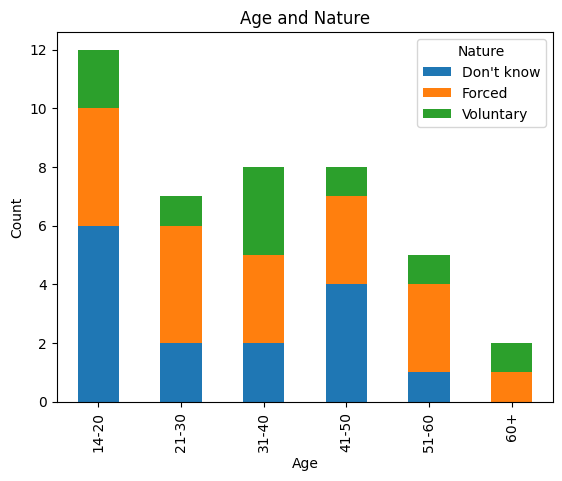

In [ ]:
grouped_data = df2.groupby(['Age','What was the nature of your movement?']).size().unstack()

# Plotting the grouped chart
grouped_data.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age and Nature')

plt.legend(title='Nature')

plt.show()

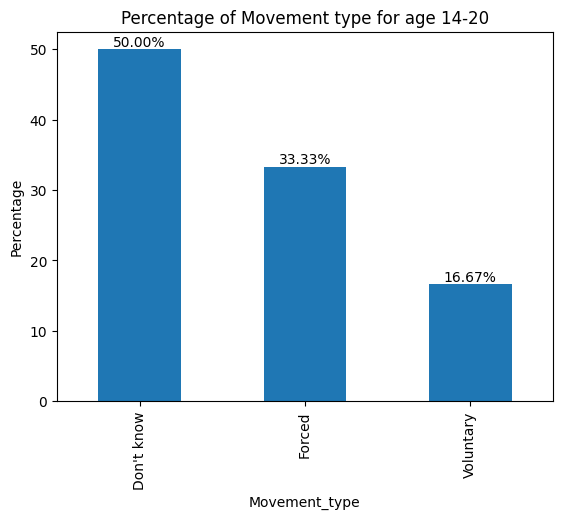

In [ ]:
maloya_male = df2[df2['Age'] == '14-20']
residence_percentage = maloya_male['What was the nature of your movement?'].value_counts(normalize=True) * 100
ax= residence_percentage.plot(kind='bar')

plt.xlabel('Movement_type')
plt.ylabel('Percentage')
plt.title('Percentage of Movement type for age 14-20')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

In [ ]:
maloya_male = df2[df2['Age'] == '21-30']
residence_percentage = maloya_male['What was the nature of your movement?'].value_counts(normalize=True) * 100
ax= residence_percentage.plot(kind='bar')

plt.xlabel('Movement_type')
plt.ylabel('Percentage')
plt.title('Percentage of Movement type for age 21-30')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

In [ ]:
maloya_male = df2[df2['Age'] == '31-40']
residence_percentage = maloya_male['What was the nature of your movement?'].value_counts(normalize=True) * 100
ax= residence_percentage.plot(kind='bar')

plt.xlabel('Movement_type')
plt.ylabel('Percentage')
plt.title('Percentage of Movement type for age 31-40')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

In [ ]:
maloya_male = df2[df2['Age'] == '41-50']
residence_percentage = maloya_male['What was the nature of your movement?'].value_counts(normalize=True) * 100
ax= residence_percentage.plot(kind='bar')

plt.xlabel('Movement_type')
plt.ylabel('Percentage')
plt.title('Percentage of Movement type for age 41-50')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

In [ ]:
maloya_male = df2[df2['Age'] == '51-60']
residence_percentage = maloya_male['What was the nature of your movement?'].value_counts(normalize=True) * 100
ax= residence_percentage.plot(kind='bar')

plt.xlabel('Movement_type')
plt.ylabel('Percentage')
plt.title('Percentage of Movement type for age 51-60')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

In [ ]:
maloya_male = df2[df2['Age'] == '60+']
residence_percentage = maloya_male['What was the nature of your movement?'].value_counts(normalize=True) * 100
ax= residence_percentage.plot(kind='bar')

plt.xlabel('Movement_type')
plt.ylabel('Percentage')
plt.title('Percentage of Movement type for age 60+')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

In [ ]:
grouped_data = df2.groupby(['How is the law and order situation (mahaul) compared to where you lived before?','What was the nature of your movement?']).size().unstack()

# Plotting the grouped chart
grouped_data.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Mahaul')
plt.ylabel('Count')
plt.title('Mahual and Nature')

plt.legend(title='Nature')

plt.show()

In [ ]:
grouped_data = df2.groupby(['What was the nature of your movement?','How is the law and order situation (mahaul) compared to where you lived before?']).size().unstack()

# Plotting the grouped chart
grouped_data.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Mahaul')
plt.ylabel('Count')
plt.title('Mahaul and Nature')

plt.legend(title='Nature')

plt.show()

In [ ]:
maloya_male = df2[df2['How is the law and order situation (mahaul) compared to where you lived before?'] == 'Same']
residence_percentage = maloya_male['What was the nature of your movement?'].value_counts(normalize=True) * 100
ax= residence_percentage.plot(kind='bar')

plt.xlabel('Movement_type')
plt.ylabel('Percentage')
plt.title('People who Answered Same to Mahaul Comparison')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

In [ ]:
maloya_male = df2[df2['How is the law and order situation (mahaul) compared to where you lived before?'] == 'Worse']
residence_percentage = maloya_male['What was the nature of your movement?'].value_counts(normalize=True) * 100
ax= residence_percentage.plot(kind='bar')

plt.xlabel('Movement_type')
plt.ylabel('Percentage')
plt.title('People who Answered worse to Mahaul Comparison')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

In [ ]:
maloya_male = df2[df2['How is the law and order situation (mahaul) compared to where you lived before?'] == 'Better']
residence_percentage = maloya_male['What was the nature of your movement?'].value_counts(normalize=True) * 100
ax= residence_percentage.plot(kind='bar')

plt.xlabel('Movement_type')
plt.ylabel('Percentage')
plt.title('People who Answered Better to Mahaul Comparison')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

In [ ]:
maloya_male = df2[df2['How is the law and order situation (mahaul) compared to where you lived before?'] == 'Don\'t know']
residence_percentage = maloya_male['What was the nature of your movement?'].value_counts(normalize=True) * 100
ax= residence_percentage.plot(kind='bar')

plt.xlabel('Movement_type')
plt.ylabel('Percentage')
plt.title('People who Answered Dont Know to Mahaul Comparison')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()